<a href="https://colab.research.google.com/github/vamshikrishna1032000/cs666student/blob/main/CS666_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

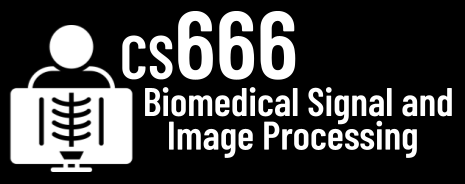

# Assignment 1

In [297]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.8/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['time']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


**Task 1** (10pts): Install the BioSPPY library with the following code.

In [298]:
!pip install biosppy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Task 2** (10 pts): Download a sample ecg dataset from https://cs666.org/data/ecg.txt and upload it to this colab. The following code loads the dataset.

In [299]:
from biosppy import storage
import biosppy
from biosppy.signals import ecg
signal, metadata = storage.load_txt('ecg.txt')

**Task 3** (10 pts): Figure out the sampling rate for this data and how many seconds it lasts.

In [300]:
SAMPLING_RATE = 1000
NUMBEROF_SECONDS = len(signal)
SECONDS = NUMBEROF_SECONDS/SAMPLING_RATE
SAMPLING_RATE, SECONDS

(1000, 15.0)

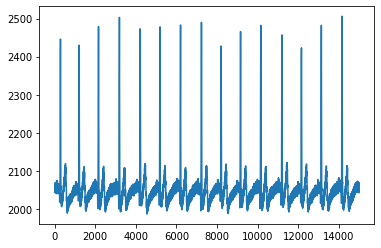

In [301]:
plt.plot(signal)

In [302]:
signal

array([2044., 2044., 2044., ..., 2044., 2045., 2043.])

In [303]:
metadata

{'sampling_rate': 1000.0, 'resolution': 12, 'labels': ['ECG']}

**Task 4** (20 pts): Process the signal with BioSPPY using the `ecg.ecg` method.

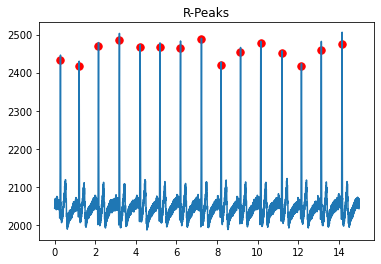

In [304]:
#Processing the signal with BioSPPY using the ecg.ecg method.
out = biosppy.signals.ecg.ecg(signal=signal, sampling_rate=SAMPLING_RATE, show=False)

ecg = np.loadtxt("ecg.txt")
rpeaks = out["rpeaks"]
time = np.arange(len(ecg)) / 1000

n_samples = 3 * SAMPLING_RATE
time_indices = np.arange(n_samples)

plt.plot(time, ecg)
plt.scatter(time[rpeaks], ecg[rpeaks], color='red', s=55)
plt.title('R-Peaks')
plt.show()


**Task 5** (10 pts): Plot the first 3 seconds of the unfiltered signal and then the filtered signal. Can you spot the P, Q, R, S, T waves?

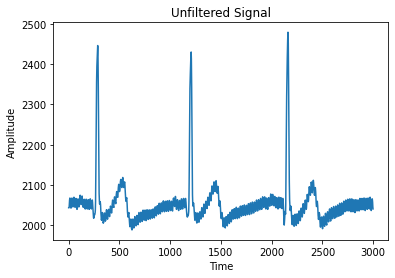

In [305]:
#First 3 seconds of the Unfiltered Signal
plt.plot(ecg[0:3000])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Unfiltered Signal')
plt.show()

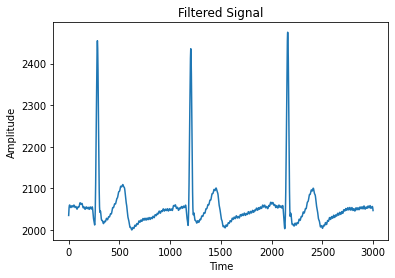

In [306]:
#Filtered Signal
SAMPLING_RATE = 1000
n_samples = 3 * SAMPLING_RATE
first_3_seconds = ecg[:n_samples]

window_size = 45
polyorder = 4
filtered_ecg = savgol_filter(first_3_seconds, window_size, polyorder)
time_indices = np.arange(n_samples)

plt.plot(time_indices, filtered_ecg)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Filtered Signal')

plt.show()

**Task 6** (15 pts): Please plot the whole filtered signal and mark the r-peaks with vertical lines based on the ecg.ecg output. You can use `plt.axvline(x = 100, color = 'r', ls=':')` to create a red, dashed vertical line at position 100. Please label the x-axis as 'time [s]'.

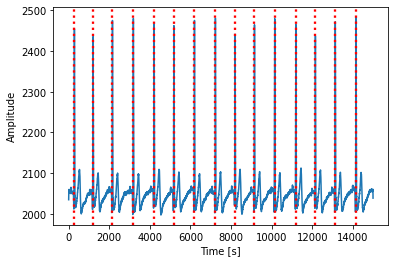

In [307]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter
import biosppy

ecg = np.loadtxt('ecg.txt')
SAMPLING_RATE = 1000
n_samples = len(ecg)

window_size = 45
polyorder = 4
filtered_ecg = savgol_filter(ecg, window_size, polyorder)
time_indices = np.arange(n_samples)

plt.plot(time_indices, filtered_ecg)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

r_peak_indices = biosppy.signals.ecg.ecg(signal=ecg, sampling_rate=1000, show=False)['rpeaks']

for r_peak_index in r_peak_indices:
    plt.axvline(r_peak_index, color = 'r', ls = ':', linewidth = 2.3)

time_in_seconds = time_indices / SAMPLING_RATE
plt.show()

**Task 7** (5 pts): Let's install the NeuroKit2 library.

In [308]:
!pip install neurokit2
import neurokit2 as nk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Task 8** (20 pts): Detect P Q S T Peaks using Neurokit.

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


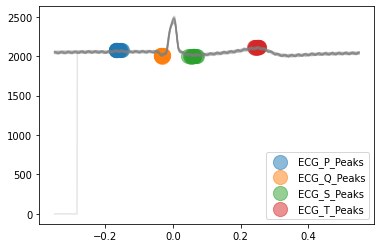

In [309]:
#Delineate
_, waves_peak = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=1000, method="peak")

_, waves_peak = nk.ecg_delineate(ecg_signal, 
                                 rpeaks, 
                                 sampling_rate=1000, 
                                 method="peak", 
                                 show=True, 
                                 show_type='peaks')

In [310]:
# We know the R spikes now but what about P Q S T waves?\n",
# TODO Can you use nk.ecg_delineate to detect them in the unfiltred signal?\n",
# Hint: Look at the tutorial: https://neuropsychology.github.io/NeuroKit/examples/ecg_delineate/ecg_delineate.html\n",
# Hint 2: The plot will have blue, orange, green, and red circles :)\n",
# Hint 3: rpeaks were detected above from biosppy's ecg.ecg method"

In [311]:
# TODO Does the detection work well?
# Yes, the detection using delineate worked well

**Bonus Task** (33 pts): Detect P Q S T Peaks for the full signal before and after filtering.

In [312]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


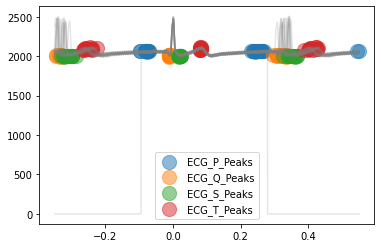

In [313]:
# Reference from https://neuropsychology.github.io/NeuroKit/examples/ecg_delineate/ecg_delineate.html\n"
signal_dwt, waves_dwt = nk.ecg_delineate(ecg_signal, 
                                         rpeaks, 
                                         sampling_rate=3000, 
                                         method="dwt", 
                                         show=True, 
                                         show_type='peaks')

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


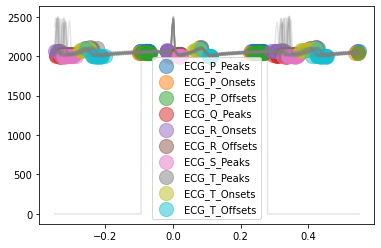

In [314]:
signal_dwt, waves_dwt = nk.ecg_delineate(ecg_signal, 
                                         rpeaks, 
                                         sampling_rate=3000, 
                                         method="dwt", 
                                         show=True, 
                                         show_type='all')

In [315]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.

In [316]:
# Finally, run the delineation on the filtered signal from BioSPPY.

In [317]:
# TODO Which one works the best?
# Delineate method works fine but I didn't find it very accurate. Still it worked good for all the peaks.

In [318]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#